# Voter System Simulation

Joshua Sanz, Robert Wang, Victor Han

In this project, we explore voter models. In our setup, a graph is generated to represent connections between voters. Each voter either has a belief or is neutral and affects its connected voters.

In [1]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats
import time


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# import our homemade voter and related classes
from VoterModel import VoterModel
from graphs import *
from vm_change import *

## Convergence Time Simulations
Now that the setup is done, let us first observe the behavior of these voter models for three specific scenarios. That is, let us take two types of graphs and two types of initializations and observe the time it takes for them to converge.

### n-complete graph
We start with a graph that is fully connected. Each voter is connected to every other and initialized with a unique belief. We plot this convergence time vs. the number of nodes. Initially, the voting is set to 'weighted_prob', where a voter changes their own belief based on a weighted probability set by its own belief and that of its neighbors. These settings can be changed in the line

    vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                    handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
                    
The possible voting methods are 

    voting_methods = ('simple', 'probability', 'weighted_prob')


In [68]:
# Convergence Time as a Function of n for an n-complete graph 

conv_time_arr = []

for n in range(2,76):
    er = complete_graph(n)
    vm = VoterModel(graph=er, voting='single_neighbor', visualization='spring',
                    handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
    vm.redraw = False
    vm.initialize('all_unique')
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    #vm.draw()
    #plt.show()

    ub = beliefs
    ctr = 0

    # Average over 5 runs
    conv_time_arr.append(0)
    for _ in range(5):
        while len(set(ub)) != 1 and ctr < 10000:
            ctr += 1
            cb, ub, ta = vm.update()
            flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

        conv_time_arr[-1] += convergence_time(time_arr, belief_arr) / 5.

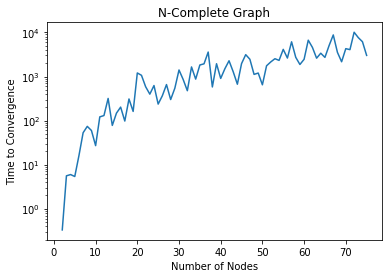

In [69]:
plt.plot(range(2,76),conv_time_arr)
plt.xlabel('Number of Nodes')
plt.ylabel('Time to Convergence')
plt.title('N-Complete Graph')
plt.yscale('log')
plt.show()

### n-ring graph
Now we do the same as above for an n-ring graph.

In [70]:
# Convergence Time as a Function of n for an n-ring graph 

conv_time_arr = []

for n in range(2,51):
    er = cycle(n)
    vm = VoterModel(graph=er, voting='single_neighbor', visualization='spring',
                    handicap_b1=1.0, handicap_b2=0.0, clock='exponential')
    vm.redraw = False
    vm.initialize('all_unique')
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    #vm.draw()
    #plt.show()

    ub = beliefs
    ctr = 0

    # Average over 5 runs
    conv_time_arr.append(0)
    for _ in range(5):
        while len(set(ub)) != 1 and ctr < 50000:
            ctr += 1
            cb, ub, ta = vm.update()
            flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

        conv_time_arr[-1] += convergence_time(time_arr, belief_arr) / 5.

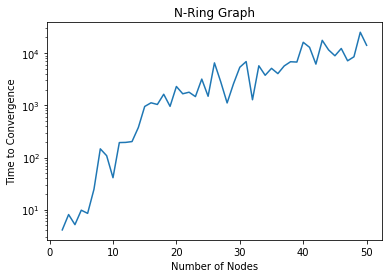

In [71]:
plt.plot(range(2,51),conv_time_arr)
plt.xlabel('Number of Nodes')
plt.ylabel('Time to Convergence')
plt.title('N-Ring Graph')
plt.yscale('log')
plt.show()

### Competition Between Two Beliefs in N-Ring Graph
Now let us take the n-ring graph and observe what happens when there is a competition between only two beliefs. All voters are initialized as one belief or another. N, the number of nodes in the graph, can easily be experimented with.

In [72]:
# Competition Between Two Beliefs in N-Ring Graph
# Fix N = 20
N = 20
er = cycle(N)
vm = VoterModel(graph=er, voting='single_neighbor', visualization='spring',
                handicap_b1=2.0, handicap_b2=0.0, clock='exponential')
vm.redraw = False

conv_time_arr = []

for i in range(1,20):
    vm.initialize('all_rand_two',k=i)
    beliefs = list(set([v.belief[0] for v in vm._voters]))
    flux_arr = []
    belief_arr = []
    time_arr = []
    
    ub = beliefs
    ctr = 0
    
    # Average over 5 runs
    conv_time_arr.append(0)
    for _ in range(5):
        while len(set(ub)) != 1 and ctr < 10000:
            ctr += 1
            cb, ub, ta = vm.update()
            flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)

        conv_time_arr[-1] += convergence_time(time_arr, belief_arr) / 5.

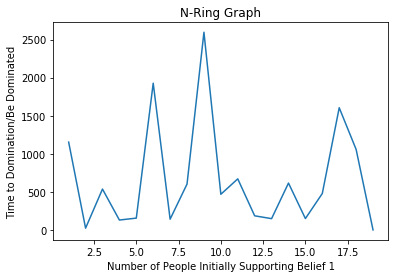

In [73]:
plt.plot(range(1,20),conv_time_arr)
plt.xlabel('Number of People Initially Supporting Belief 1')
plt.ylabel('Time to Domination/Be Dominated')
plt.title('N-Ring Graph')
plt.show()

## More Simulation Options
Now that we have some idea about convergence properties, we can also explore the model more and have fun with visualizing more things.

### Visualizing the graph state over time
Let us observe plots of the graphs for a fixed number of nodes as well as plots summarizing how beliefs change. The resulting graph figures can be saved as gifs to replay later.

In [74]:
N = 10
er = erdos_renyi(N, 0.5)
#er = complete_graph(N)
#er = cycle(N)
#er = torus_2d(5,2)

In [75]:
# vm = VoterModel(graph = er, voting='simple', visualization='shell')
# vm = VoterModel(graph = er, voting='probability', visualization='shell')
vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                handicap_b1=1.0, handicap_b2=0.0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


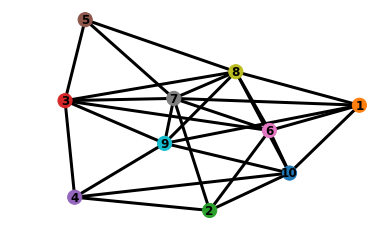

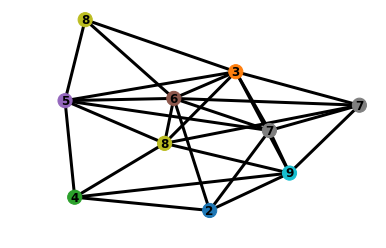

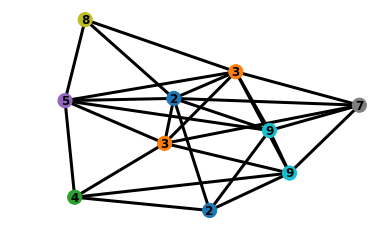

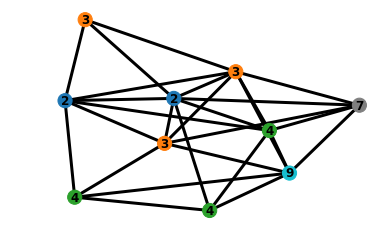

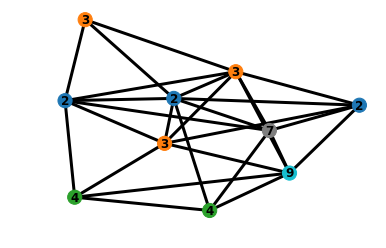

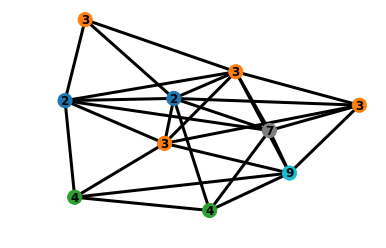

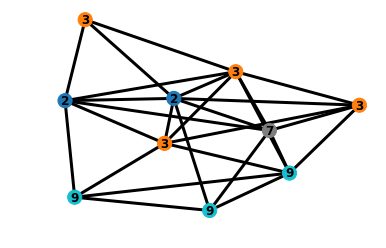

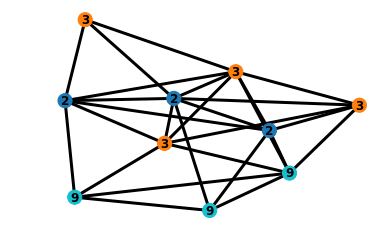

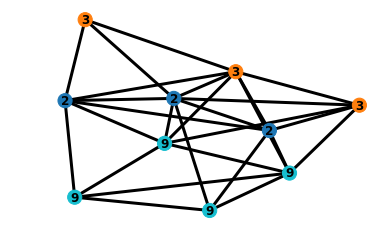

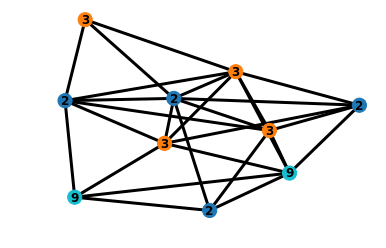

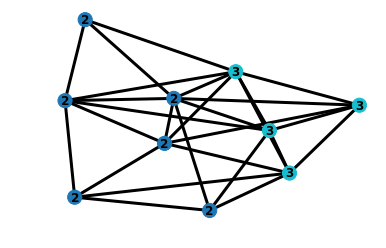

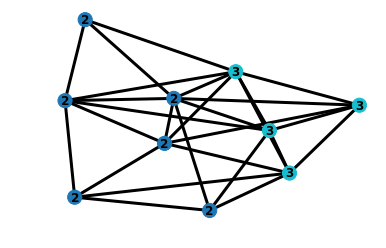

In [76]:
vm.redraw = False # We don't want an animation, and just want a new figure each time
vm.initialize('all_unique')
beliefs = list(set([v.belief[0] for v in vm._voters]))
flux_arr = []
belief_arr = []
time_arr = []

vm.draw()
plt.show()
for i in range(50):
    cb, ub, ta = vm.update()
    flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)
    if i % 5 == 0:
        vm.draw()
        plt.show()
vm.draw()
plt.show()
vm.save_gif(fps=1, fname='sim1.gif')

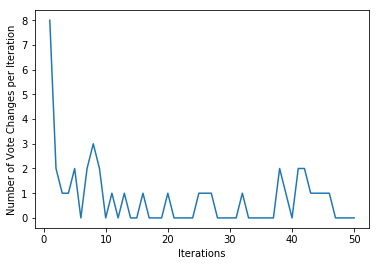

In [77]:
# Plot the average number of belief changes per iteration
if vm.clock == "discrete":
    plt.figure()
    plot_flux(flux_arr)

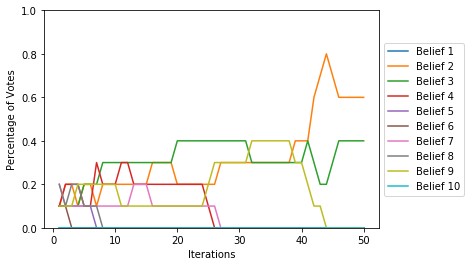

In [78]:
# Plot the distribution of beliefs per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_comparisons(belief_arr, beliefs)

In [79]:
convergence_time(time_arr, belief_arr)

50

<IPython.core.display.Javascript object>


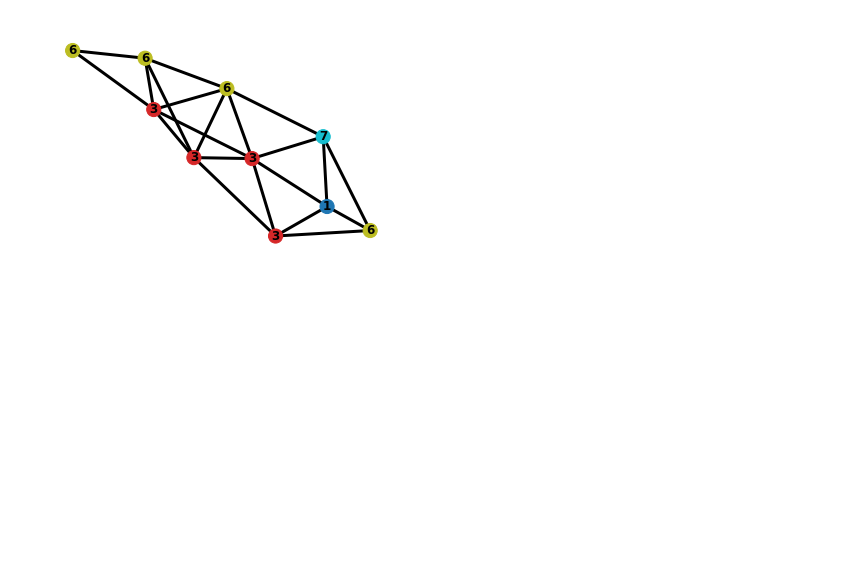

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [80]:
# Here we demonstrate an animation. The resulting animation is also saved to a gif.
# The below magic command is needed for the animation.
%matplotlib notebook
N = 10
er = erdos_renyi(N, 0.5)
vm = VoterModel(graph=er, voting='weighted_prob', visualization='spring',
                handicap_b1=1.0, handicap_b2=0.0)
vm.initialize('all_unique')
beliefs = list(set([v.belief[0] for v in vm._voters]))
flux_arr = []
belief_arr = []
time_arr = []
vm.draw()
plt.show()

for i in range(10):
    cb, ub, ta = vm.update()
    plt.pause(0.1)
    flux_arr, belief_arr, time_arr = track_changes(cb, ub, ta, flux_arr, belief_arr, time_arr, beliefs)
    vm.draw()
    
vm.save_gif(fps=1, fname='sim2.gif')
%matplotlib inline

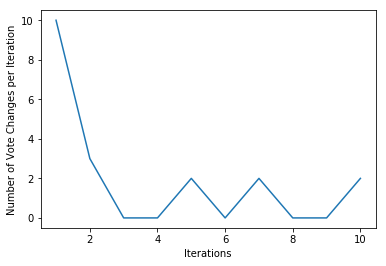

In [81]:
# Plot the number of belief changes per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_flux(flux_arr)

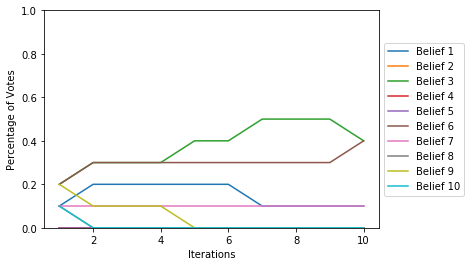

In [82]:
# Plot the distribution of beliefs per iteration
if vm.clock == 'discrete':
    plt.figure()
    plot_comparisons(belief_arr, beliefs)

In [83]:
convergence_time(time_arr,belief_arr)

10